n_trees:1
n_batches:1
[[0, 1, ()], [0, -1, ()], [0, 1, ()], [0, -1, ()], [-5, 1, (0,)], [0, -2, ()], [-5, 0, ()], [0, -2, ()]]
[0, -1, 0, -1, 5, -2, 5, -2]
[4414.75 4409.25 4412.25 ... 4924.75 4914.5  4916.75] [4414.75 4409.25 4412.25 ... 4924.75 4914.5  4916.75]


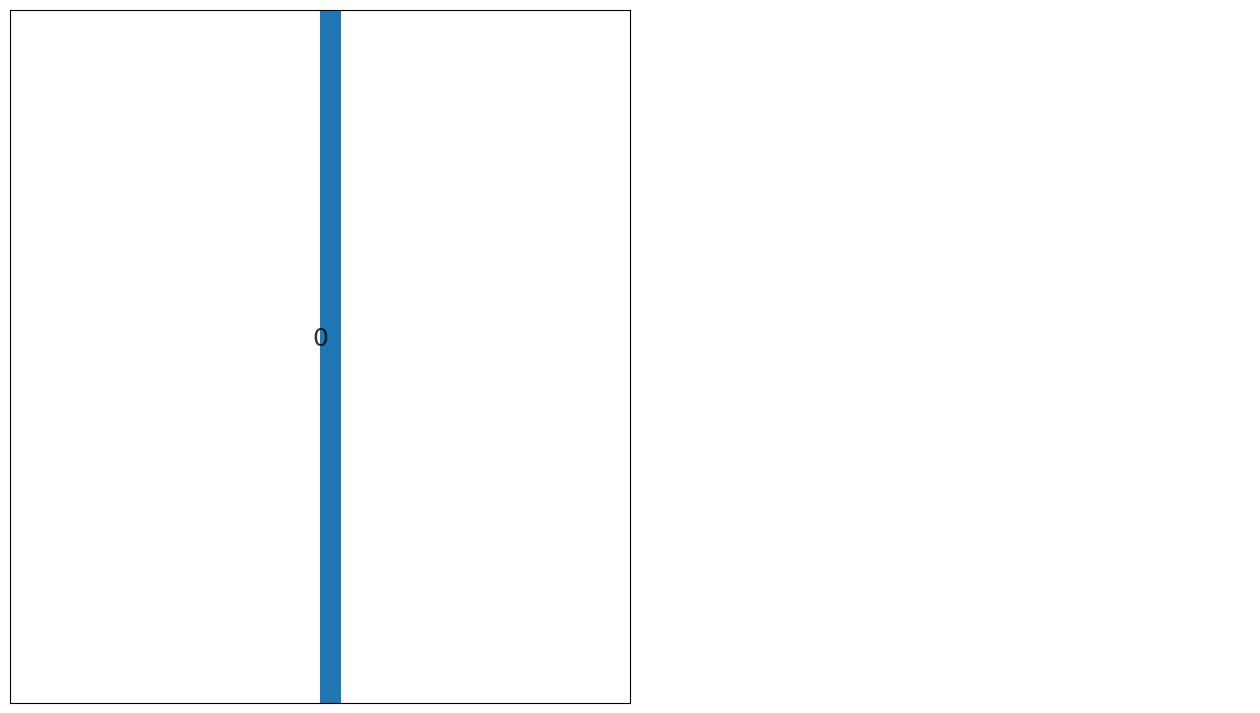

In [174]:
import numpy as np
import pandas as pd
import genetic_algorithm.population as population

pop = population.generate_random_forest(1, 2)
pop2, _= population.oplist2forests([
    [[0, 1, ()], [0, -1, ()], [0, 1, ()], [0, -1, ()], [-5, 1, (0,)], [0, -2, ()], [-5, 0, ()], [0, -2, ()]]
],[0],1)
import genetic_algorithm.transforms as transforms
data = pd.read_csv("../data/ES15.csv")
x_raw = data.values

use = pop2[0]

print(transforms.get_oplist(use[0]))
x_gen = transforms.forest2features(
    population=use,
    x_raw=x_raw
)
import genetic_algorithm.visualization as visualization

# assume x_gen is your data array of shape (n_samples, n_features)
x = pd.DataFrame(x_gen)

visualization.visualize_all_distributions(x=x)

In [ ]:
for i in range(x_gen.shape[1]):
	print(np.all(x_gen[:, i] == 0))

In [ ]:
import genetic_algorithm.evaluation as evaluation

scoresdf, bestlist, scorelist = \
    evaluation.evaluate_forest(x_gen, x_raw[:, 3], n_bins=300,lag_range=(2,4))


print(scoresdf)
print(bestlist)

In [ ]:
oplist = transforms.get_oplist(pop[bestlist[0]])
print(oplist)
img = visualization.visualize_tree(pop[bestlist[0]])

In [ ]:
img

deltas: [17, 8, 8, 33, 40, 27, 21, 30, 10]
deltas: [27, 2, 5]
deltas: [31]
[np.float64(0.9994439138235687), np.float64(0.9953458606254536), np.float64(0.9998137866850005), np.float64(0.9995798059861202), np.float64(0.9999652952146744), np.float64(0.9990613492221722), np.float64(0.9999055349703126), np.float64(0.999854474705156), np.float64(0.9999380641468294), np.float64(0.9999907950878881), np.float64(1.0000183465019328), np.float64(0.9999380641468294), np.float64(0.9957398961066541), np.float64(0.9999440736795544), np.float64(0.9998811380060599), np.float64(0.9999657810236156), np.float64(0.9998060397527804), np.float64(0.9999543230720978), np.float64(0.9999610670400679), np.float64(0.9999662826822711), np.float64(0.9996101748834209), np.float64(0.9996619118860979), np.float64(0.9998524774612196), np.float64(0.9996814315912335), np.float64(0.9997406557329985), np.float64(1.0), np.float64(0.9996606120278276), np.float64(0.9999657810236156), np.float64(0.9998811380060599), np.float64(0

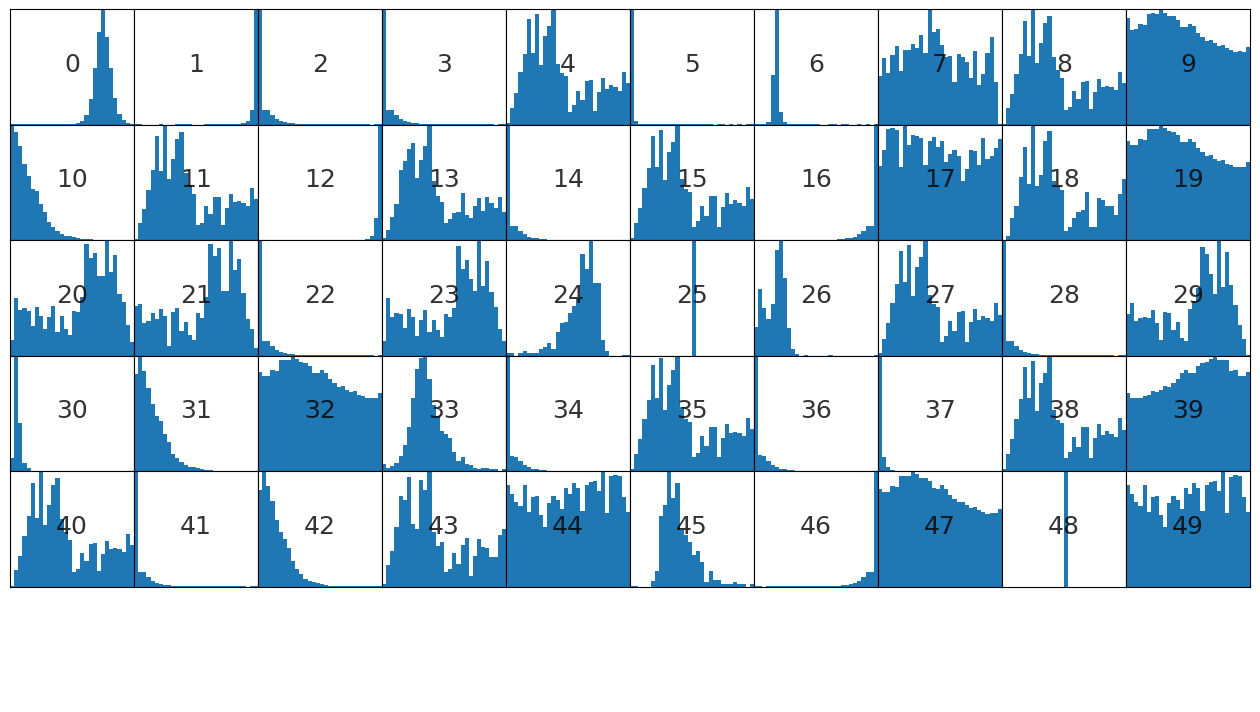

forfeat forest type: <class 'numpy.ndarray'>
[np.float64(0.9997349375699507), np.float64(0.9953458606254536), np.float64(0.999855935023165), np.float64(0.9998913223484391), np.float64(0.9999652952146744), np.float64(0.9990613492221722), np.float64(0.9978794062163633), np.float64(0.9999991294692364), np.float64(0.9999380641468294), np.float64(0.9999495751027851), np.float64(0.999328309352871), np.float64(0.9999380641468294), np.float64(0.9957398961066541), np.float64(0.9998866026051957), np.float64(0.9998811380060599), np.float64(0.9999657810236156), np.float64(0.999805698979343), np.float64(0.9999998299627086), np.float64(0.9999419225486701), np.float64(0.999950830180476), np.float64(0.999621314343043), np.float64(0.9996863180940857), np.float64(0.9998524774612196), np.float64(0.9996488156483337), np.float64(0.9993652486950226), np.float64(1.0), np.float64(0.999748335582246), np.float64(0.9999657810236156), np.float64(0.9998811380060599), np.float64(0.9996491871923835), np.float64(0.99

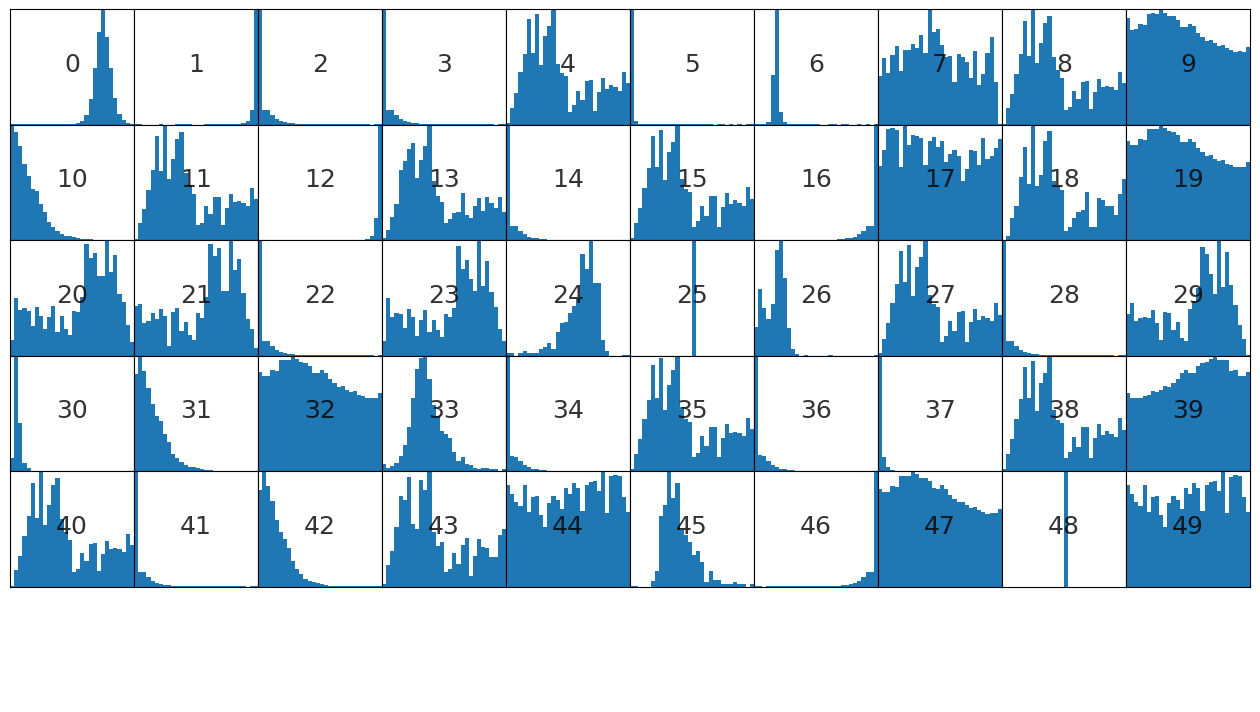

forfeat forest type: <class 'numpy.ndarray'>
[np.float64(0.9997349375699507), np.float64(0.9953458606254536), np.float64(0.999855935023165), np.float64(0.9998913223484391), np.float64(0.9999652952146744), np.float64(0.9990613492221722), np.float64(0.9978794062163633), np.float64(0.9999991294692364), np.float64(0.9999380641468294), np.float64(0.9999495751027851), np.float64(0.999328309352871), np.float64(0.9999380641468294), np.float64(0.9957398961066541), np.float64(0.9998866026051957), np.float64(0.9998811380060599), np.float64(0.9999657810236156), np.float64(0.999805698979343), np.float64(0.9999998299627086), np.float64(0.9999419225486701), np.float64(0.999950830180476), np.float64(0.999621314343043), np.float64(0.9996863180940857), np.float64(0.9998524774612196), np.float64(0.9996488156483337), np.float64(0.9993652486950226), np.float64(1.0), np.float64(0.999748335582246), np.float64(0.9999657810236156), np.float64(0.9998811380060599), np.float64(0.9996491871923835), np.float64(0.99

In [10]:
import genetic_algorithm.population as population
import genetic_algorithm.mutation as mutation
import genetic_algorithm.transforms as transforms
import genetic_algorithm.optimize as optimize
import pandas as pd
import numpy as np
data = pd.read_csv("../data/ES15.csv")
x_raw = data.values

pop = population.generate_random_forest(50, 12)

np.seterr(all='ignore')
best_forest, best_scores, best_overtime = optimize.optimize_constants(
    pop, x_raw, sthresh_q=.1
)

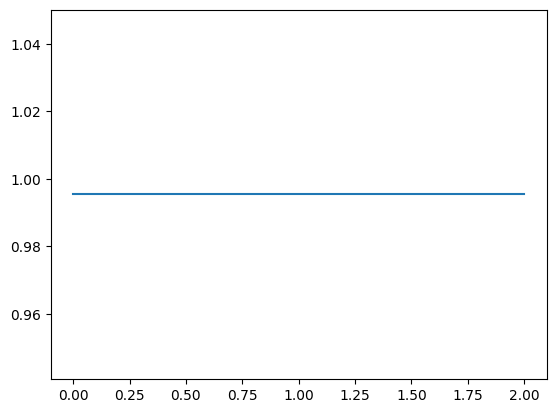

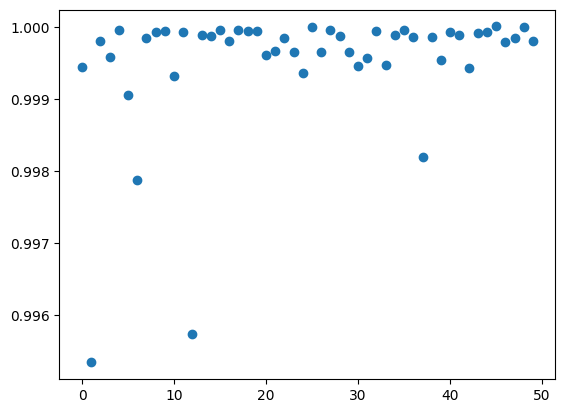

In [11]:
import matplotlib.pyplot as plt
plt.plot(best_overtime)
plt.show()
plt.scatter(range(len(best_scores)), best_scores)
plt.show()

In [ ]:
best_scores[3]

In [ ]:
import numpy as np
x_ = transforms.forest2features(
    population=best_forest,
    x_raw=x_raw
)
y_ = np.pad(
    np.log(x_raw[1:, 3] / x_raw[:-1, 3]),
    (0,1),
    mode='constant',
    constant_values=0.0)

In [ ]:
print(np.std(y_))

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from keras.optimizers.schedules import ExponentialDecay

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='loss',
    factor=0.95, 
    patience=20, 
    min_lr=1e-6
)

opt  = tf.keras.optimizers.Adam(learning_rate=0.02)
opt2 = tf.keras.optimizers.SGD(learning_rate=0.02)

def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='linear'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation='linear'),  
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='linear'),       
        tf.keras.layers.Dense(1, activation='linear')  # Output layer for regression
    ])
    
    rmse='root_mean_squared_error'

    model.compile(optimizer=opt, loss='mse', metrics=['mae','R2Score'])
    return model


epochs = 2000

with tf.device('/GPU:0'):
	model = build_model()
	history = model.fit(X_train, y_train, epochs=epochs, batch_size=512, \
                     validation_split=0.2, verbose=1, shuffle=True, callbacks=[reduce_lr])
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.scatter(y_pred, y_test, s=1)
plt.grid()
plt.axis('tight')
plt.title('Testing Outputs')
plt.xlabel('y_pred')
plt.xlim(-0.015,0.015)
plt.ylim(-0.015,0.015)
plt.ylabel('y_test')
ax = plt.gca()
x_vals = np.array(ax.get_xlim())
y_vals = x_vals  # Since y = x
plt.plot(x_vals, y_vals, '-', color='black', label='y = x', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0,color='black',linewidth=0.5)
plt.show()

In [ ]:
tp, fp, tn, fn = 0, 0, 0, 0
tp5, fp5, tn5, fn5 = 0, 0, 0, 0
for i in range(len(y_pred)):
    if(y_pred[i]>0):
        if(y_test[i]>0):
            tp+=1
        if(y_test[i]<0):
            fp+=1
        if(y_pred[i]>=5):
            if(y_test[i]>0):
                tp5+=1
            if(y_test[i]<0):
                fp5+=1
    if(y_pred[i]<0):
        if(y_test[i]<0):
            tn+=1
        if(y_test[i]>0):
            fn+=1
        if(y_pred[i]<=-5):
            if(y_test[i]<0):
                tn5+=1
            if(y_test[i]>0):
                fn5+=1
directionalAccuracy = ((tp+tn)/(tp+fp+tn+fn))*10000//1/100
print('Directional Accuracy:\t\t',directionalAccuracy)